In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
np.random.seed(0)


Problem 1 - Part a:

In [2]:
data = np.genfromtxt("data/curve80.txt",delimiter=None)
X = data[:,0]
X = X[:,np.newaxis] # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

Problem 1 - Part b:

In [3]:
lr = ml.linear.linearRegress( Xtr, Ytr ); # create and train model
xs = np.linspace(0,10,200); # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs ); # make predictions at xs
YhatTrain = lr.predict(Xtr)
YhatTest = lr.predict(Xte) 

In [4]:
def mse(Yhat,Y):
    mse=0
    for i in range(0,len(Y)):
        mse = mse + ((Y[i]-Yhat[i])*(Y[i]-Yhat[i]))
    return mse/len(Y)

Theta : [[-2.82765049  0.83606916]]
Mean Squared Error(MSE) on Traning data:  [1.12771196]
Mean Squared Error(MSE) on Test data:  [2.2423492]


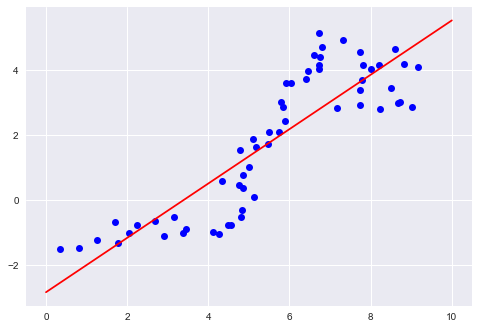

In [5]:
print("Theta :",lr.theta)
print("Mean Squared Error(MSE) on Traning data: ",mse(YhatTrain,Ytr))
print("Mean Squared Error(MSE) on Test data: ",mse(YhatTest,Yte))
plt.style.use('seaborn')
plt.scatter(Xtr,Ytr,c='b')
plt.plot(xs,ys,'r')
ax=plt.axis()

Problem 1 - Part c:

Plotting learned prediction function for every degree:

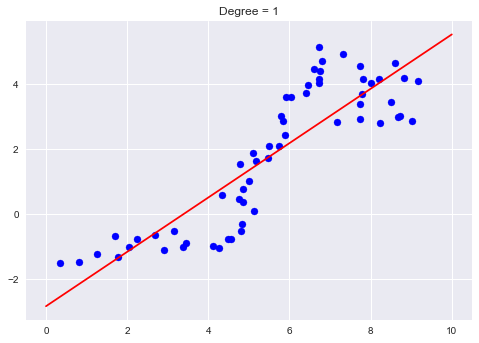

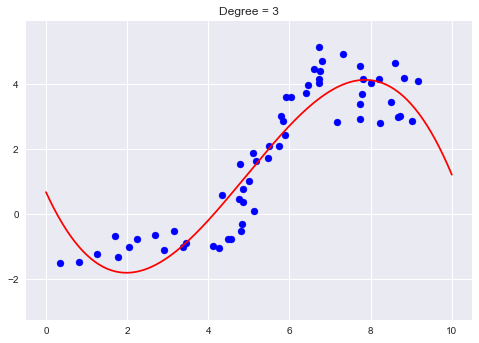

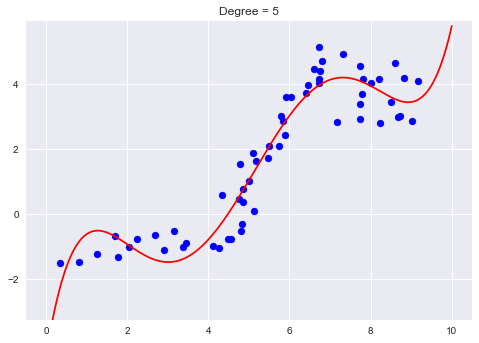

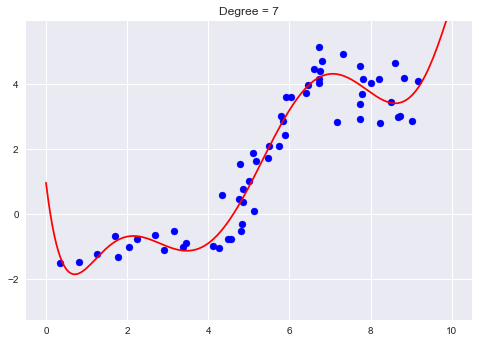

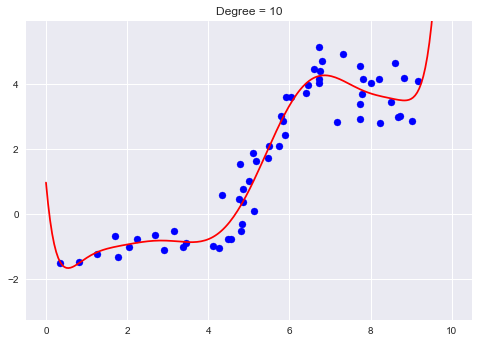

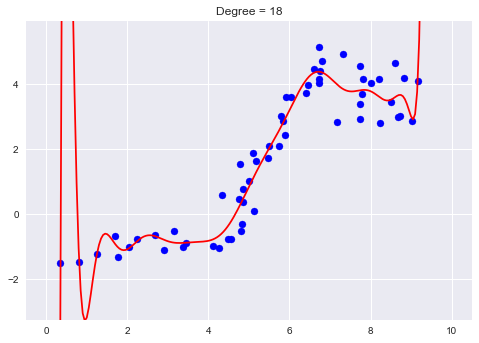

In [6]:
mseTrain = []
mseTest = []
degrees = [1,3,5,7,10,18]
for degree in degrees:
    XtrPoly = ml.transforms.fpoly(Xtr, degree, bias=False);
    XtrPoly,params = ml.transforms.rescale(XtrPoly)
    lr = ml.linear.linearRegress(XtrPoly, Ytr)
    XteP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False))
    Phi = lambda X: ml.transforms.rescale( ml.transforms.fpoly(X, degree,False), params)[0]
    YhatTrain = lr.predict( Phi(Xtr) ); # predict on training data
    YhatTest = lr.predict( Phi(Xte) ); # predict on test data
    ys = lr.predict( Phi(xs) )
    mseTrain.append(mse(YhatTrain,Ytr))
    mseTest.append(mse(YhatTest,Yte))
    plt.axis(ax)
    plt.title('Degree = '+str(degree))
    plt.scatter(Xtr,Ytr,c='b')
    plt.plot(xs,ys,'r')
    plt.show()

Plotting training and test errors :

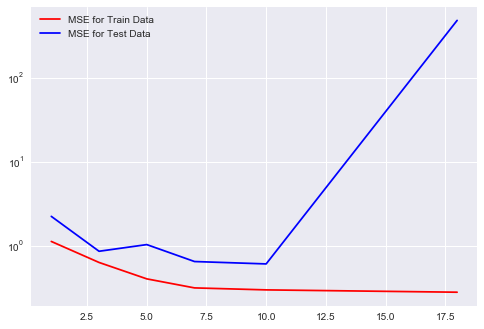

In [7]:
plt.semilogy(degrees,mseTrain,'r',label='MSE for Train Data')
plt.semilogy(degrees,mseTest,'b',label='MSE for Test Data')
plt.legend(loc='upper left')

Problem 2 - Part a:

In [8]:
mseCrossValidate = []
for degree in degrees:
    Phi = lambda X: ml.transforms.rescale( ml.transforms.fpoly(X, degree,False), params)[0]
    mseVal = []
    nFolds = 5;
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold);
        XtiPoly = ml.transforms.fpoly(Xti, degree, bias=False) # TODO: train on Xti, Yti , the data for this fold
        XtiPoly,params = ml.transforms.rescale(XtiPoly)
        lr = ml.linear.linearRegress(XtiPoly,Yti)
        Yvihat = lr.predict( Phi(Xvi) )
        mseVal.append(mse(Yvihat,Yvi))
    mseCrossValidate.append(np.mean(mseVal))
print(mseCrossValidate)

[1.2118626629641984, 0.7429005752051662, 0.5910703726406558, 0.7335637831345124, 0.7677056859348375, 216818.1573423788]


Problem 2 - Part b: 

Text(0.5,1,'Cross validation Error vs Degrees')

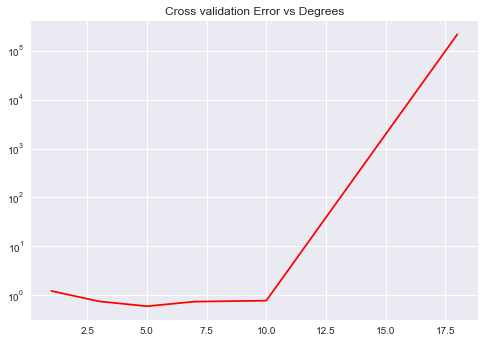

In [9]:
plt.semilogy(degrees,mseCrossValidate,'r')
plt.title('Cross validation Error vs Degrees')

Problem 2 - Part c: Degree=5 has the minimum cross-validation error, which is evident from above graph.

Problem 2 - Part d:

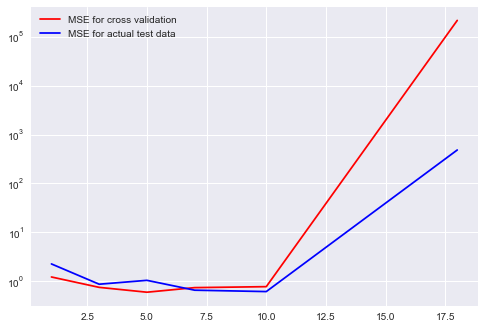

In [10]:
plt.semilogy(degrees,mseCrossValidate,'r',label = 'MSE for cross validation')
plt.semilogy(degrees,mseTest,'b',label = 'MSE for actual test data')
plt.legend(loc='upper left')